In [2]:
from lolviz import *
import pandas as pd
import numpy as np

We have selected a data set containing the populations of all cities in the state of California. 

In [3]:
cities = pd.read_csv('data/list-cities-california-state-us.csv')
cities = cities.dropna() #remove missing data from the dataset
print(cities.shape)
cities.head(3)

(965, 4)


,Name,Type,County,Population (2010)
0,Adelanto,City,San Bernardino,"31,765"
1,Agoura Hills,City,Los Angeles,"20,330"
2,Alameda,City,Alameda,"73,812"


We created an unordered list of tuples containing all cities and their corresponding populations. 

In [4]:
def create_linear_table(city_names, population):
    linear_table = []
    for i, city in enumerate(city_names):
        linear_table.append((city, population.iloc[i]))
    return linear_table

Our linear search function looks through the list of tuples one by one with complexity O(n) to find the desired city and return its population.

In [5]:
def linear_search(city_names, city):
    for c, p in city_names:
        if c == city:
            return p

Using linear search, it takes 30.3 microseconds to find Yucca Valley's population. 

In [6]:
linear_table = create_linear_table(cities['Name'], cities['Population (2010)'])
%time linear_search(linear_table, 'Yucca Valley')

CPU times: user 28 µs, sys: 3 µs, total: 31 µs
Wall time: 34.1 µs


'20,700'

The htable is a list of empty lists, called buckets.

In [7]:
def htable(nbuckets):
    return [[] for i in range(nbuckets)]

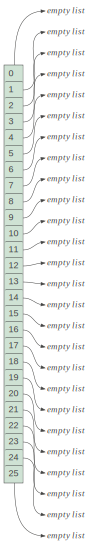

In [8]:
hash_table = htable(26)
objviz(hash_table)

Our hashcode converts the first character into an integer value between 0-25. Each bucket is a container for each letter in the alphabet. 

In [9]:
def hashcode(city):
    h = ord(city[0]) - ord('A')
    return h

In [10]:
print(hashcode('Apple'))
print(hashcode('Zebra'))

0
25


Our placement function uses the hashcode of a given city to place a tuple of the city with its respective population in the correct bucket. If the city entry already exists within the hashtable, the population value is updated. Otherwise, the tuple is merely added to the bucket as a new entry.

In [11]:
def htable_put(table, key, value):
    bucket = hashcode(key)
    if len(table[bucket]) == 0:
        table[bucket].append((key, value))
    else:
        for i, elem in enumerate(table[bucket]):
            if key == elem[0]:
                table[bucket][i] = (key, value)
                return
        table[bucket].append((key, value))

In [12]:
for city, population in zip(cities['Name'], cities['Population (2010)']):
        htable_put(hash_table, city, population)

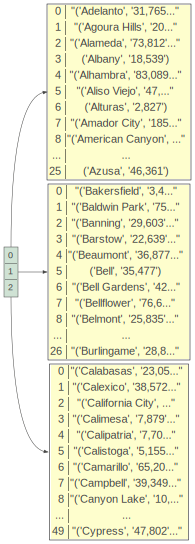

In [13]:
lolviz(hash_table[0:3])

Our retrieval function uses a given city name to retrieve its bucket index. The function linearly searches the respective bucket to find the city and return its population. 

In [14]:
def htable_get(table, key):
    bucket = hashcode(key)
    for elem in table[bucket]:
        if key == elem[0]:
            return elem[1]
    return None

CPU times: user 7 µs, sys: 4 µs, total: 11 µs
Wall time: 11.9 µs


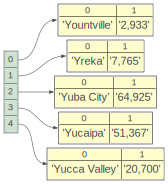

In [15]:
%time htable_get(hash_table, 'Yucca Valley')
lolviz(hash_table[24][-5:])

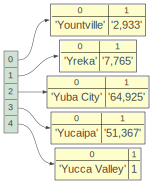

In [16]:
#This updates the Yucca Valley entry within the hashtable
htable_put(hash_table, 'Yucca Valley', 1)
lolviz(hash_table[24][-5:])

In [17]:
htable_get(hash_table, 'Yucca Valley')

1